## Análisis de los casos de covid en Uruguay

La data para este análisis proviene de del repositorio de GitHub de [Our World In Data](https://github.com/owid/covid-19-data), la cual se actualiza diariamente.

### Importando los paquetes necesarios

In [1]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

#### Leyendo los datos de la fuente

In [2]:
# Reading data and storing in pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
print('dataframe has: {} rows'.format(df.shape[0]))

dataframe has: 92340 rows


#### Seleccionando  un subset de datos

In [3]:
# Selecting a subset of data corresponding to the location Uruguay
uy = df[df["location"] == "Uruguay"]
# Printing first 5 rows
uy.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
88013,URY,South America,Uruguay,2020-03-13,4.0,4.0,NaN,NaN,NaN,NaN,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817
88014,URY,South America,Uruguay,2020-03-14,6.0,2.0,NaN,NaN,NaN,NaN,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817
88015,URY,South America,Uruguay,2020-03-15,8.0,2.0,NaN,NaN,NaN,NaN,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817
88016,URY,South America,Uruguay,2020-03-16,29.0,21.0,NaN,NaN,NaN,NaN,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817
88017,URY,South America,Uruguay,2020-03-17,50.0,21.0,NaN,NaN,NaN,NaN,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817


In [4]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy.shape[0]))

dataframe has: 444 rows


##### Mostrando los últimos registros que se actualizaron en la base de datos

In [5]:
# Display
uy.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
88452,URY,South America,Uruguay,2021-05-26,276435.0,4576.0,3867.143,4022.0,49.0,54.857,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817
88453,URY,South America,Uruguay,2021-05-27,280372.0,3937.0,3775.857,4066.0,44.0,53.571,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817
88454,URY,South America,Uruguay,2021-05-28,282198.0,1826.0,3379.714,4118.0,52.0,51.143,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817
88455,URY,South America,Uruguay,2021-05-29,288172.0,5974.0,3737.571,4176.0,58.0,52.143,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817
88456,URY,South America,Uruguay,2021-05-30,291488.0,3316.0,3770.000,4213.0,37.0,48.857,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.8,77.91,0.817


#### Creando columnas separadas para día, mes y año

In [6]:
# Creating separate columns for day, month and year
uy['year'] = pd.DatetimeIndex(uy['date']).year
uy['month'] = pd.DatetimeIndex(uy['date']).month
uy['month'] = uy['month'].apply(lambda x: calendar.month_abbr[x])
uy['day'] = pd.DatetimeIndex(uy['date']).day

#Selecting data for 2021 year only
uy21 = uy[uy["year"] == 2021]

<ipython-input-6-90946e2be140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uy['year'] = pd.DatetimeIndex(uy['date']).year
<ipython-input-6-90946e2be140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uy['month'] = pd.DatetimeIndex(uy['date']).month
<ipython-input-6-90946e2be140>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [7]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy21.shape[0]))

dataframe has: 150 rows


#### Visualizando los datos para los casos ocurridos en Uruguay durante 2021

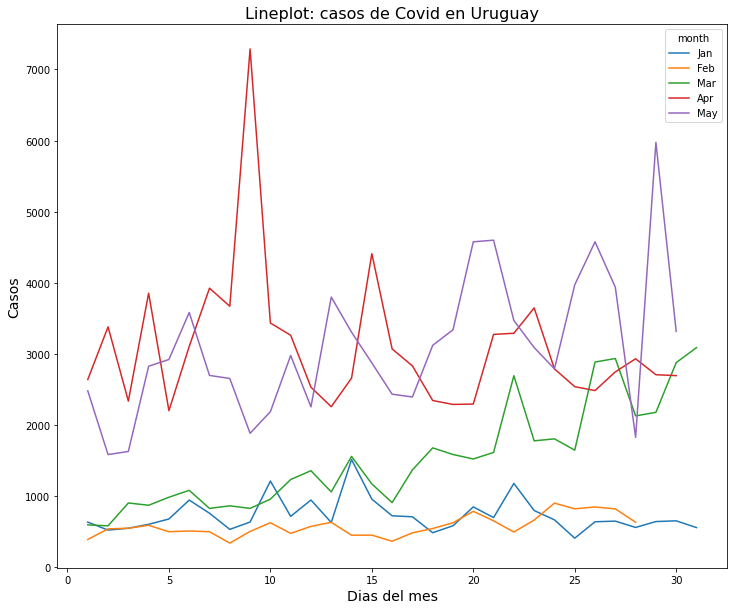

In [8]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=0)
sns.lineplot(x="day",
            y="new_cases",
            hue="month",
            data=uy21)
plt.ylabel("Casos", size=14)
plt.xlabel("Dias del mes", size=14)
plt.title("Lineplot: casos de Covid en Uruguay", size=16)

# Utilizando la funcion plt.show() se logra visualizar la grafica
plt.show()